<a href="https://colab.research.google.com/github/noersy/cvison_riced/blob/master/tubes_kecerdasan_buatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#github repository sync in google colab
import os

!rm -rf '/content/cnn_tubes'

try:
  # Colab only
  !git clone https://github.com/noersy/cnn_tubes.git
  os.chdir('/content')      
except Exception:
  pass

Cloning into 'cnn_tubes'...
remote: Enumerating objects: 3675, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 3675 (delta 1), reused 15 (delta 1), pack-reused 3660
Receiving objects: 100% (3675/3675), 162.68 MiB | 39.41 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Checking out files: 100% (4754/4754), done.


In [21]:
# Definisikan path untuk data daun_nangka dan data daun_sirih
base_dir = '/content/cnn_tubes'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validasi')

In [22]:
# # Tampilkan 8 image per kelas dengan ukuran 4x4 

# %matplotlib inline

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# nrows = 5
# ncols = 5

# pic_index = 0

# fig = plt.gcf()
# fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index += 8
# train_pix = [os.path.join(train_dir, fname) 
#                 for fname in os.listdir(train_dir)[pic_index-8:pic_index]]
# validation_pix = [os.path.join(validation_dir, fname) 
#                 for fname in os.listdir(validation_dir)[pic_index-8:pic_index]]

# for i, img_path in enumerate(train_pix+validation_pix):
#   # Set up subplot; subplot indices start at 1
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

In [23]:
import cv2
import numpy as np

In [24]:
# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" or ".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [25]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" or ".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [26]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (4624, 150, 150, 3)
Train Label =  (4624,)
Validation Data =  (120, 150, 150, 3)
Validation Label =  (120,)


In [27]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [212 204 205]
Data setelah di-normalisasi  [0.83137256 0.8        0.8039216 ]


In [28]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[38:42])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[38:42])

Label sebelum di-encoder  ['Blast' 'Blast' 'Blast' 'Blast']
Label setelah di-encoder  [1 1 1 1]


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [30]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [31]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 64)      

In [33]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
H = model.fit(x_train, y_train, batch_size=30, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
155/155 [==============================] - 97s 622ms/step - loss: -30283.1875 - acc: 0.3272 - val_loss: 6429.1831 - val_acc: 0.3167
Epoch 2/15
155/155 [==============================] - 96s 620ms/step - loss: -2667878.5000 - acc: 0.3235 - val_loss: 1000381.8750 - val_acc: 0.3333
Epoch 3/15
155/155 [==============================] - 96s 621ms/step - loss: -48862176.0000 - acc: 0.3214 - val_loss: 2511069.7500 - val_acc: 0.3167
Epoch 4/15
155/155 [==============================] - 96s 617ms/step - loss: -356513824.0000 - acc: 0.3205 - val_loss: -3891882.7500 - val_acc: 0.3083
Epoch 5/15
155/155 [==============================] - 96s 618ms/step - loss: -1347342976.0000 - acc: 0.3183 - val_loss: -32412468.0000 - val_acc: 0.3000
Epoch 6/15
155/155 [==============================] - 95s 616ms/step - loss: -3894380544.0000 - acc: 0.3246 - val_loss: 47129124.0000 - val_acc: 0.3083
Epoch 7/15
155/155 [==============================] - 95s 613ms/step - loss: -9450297344.0000 - acc: 0.3

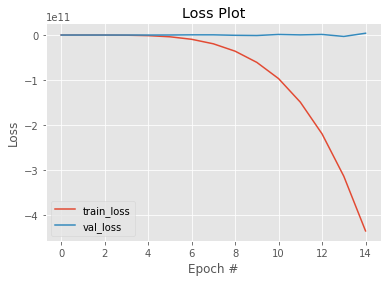

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

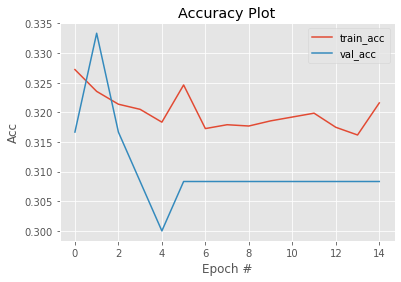

In [36]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.32      0.93      0.47        40
           2       0.00      0.00      0.00        40

    accuracy                           0.31       120
   macro avg       0.11      0.31      0.16       120
weighted avg       0.11      0.31      0.16       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
